# K-means clustering in ml 

In [1]:
#imprting the liberies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#impoting the data set 
ds=pd.read_csv("Downloads\Mall_Customers.csv")
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
ds.shape

(200, 5)

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
ds.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
x=ds.iloc[:,[3,4]].values

In [8]:
#k-means modeling 
from sklearn.cluster import KMeans

In [15]:
#using the elbow method to find the optimail no of cluters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Rohit Jain\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21850.165282585633,
 19672.07284901432]

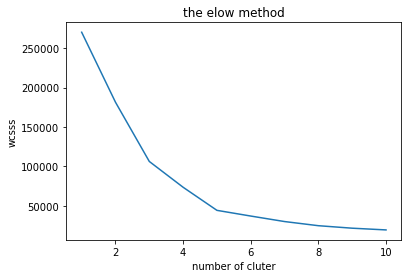

In [17]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.title("the elow method")
plt.xlabel("number of cluter")
plt.ylabel("wcsss")
plt.show()

In [18]:
#fit the k-means model o the data 
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)

In [21]:
#predict
y_kmeans=kmeans.fit_predict(x)

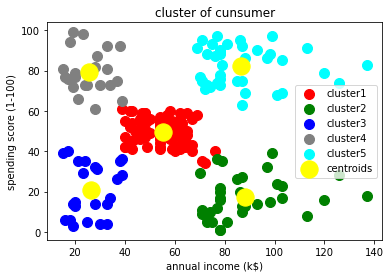

In [24]:
#visual the cluster
plt.scatter(x[y_means==0,0],x[y_kmeans==0,1],s=100,c="red",label="cluster1")

plt.scatter(x[y_means==1,0],x[y_kmeans==1,1],s=100,c="green",label="cluster2")

plt.scatter(x[y_means==2,0],x[y_kmeans==2,1],s=100,c="blue",label="cluster3")

plt.scatter(x[y_means==3,0],x[y_kmeans==3,1],s=100,c="gray",label="cluster4")

plt.scatter(x[y_means==4,0],x[y_kmeans==4,1],s=100,c="cyan",label="cluster5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="centroids")

plt.title("cluster of cunsumer")
plt.xlabel("annual income (k$)")
plt.ylabel("spending score (1-100)")
plt.legend()
plt.show()